# Milestone 3 Notebook

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from math import log, sqrt, sin
from sklearn.preprocessing import PowerTransformer

## Table of Contents

1. **[Data Overview](#data-overview)**
    - 1.1 [Data Description](#data-description)
    - 1.2 [Data Summary](#data-summary)
2. **[Exploratory Data Analysis](#exploratory-data-analysis)**
    - 3.1 [Deeper Understanding of the Data](#deeper-understanding-of-the-data)
    - 3.2 [Meaningful Insights](#meaningful-insights)
    - 3.3 [Noteworthy Findings](#noteworthy-findings)
3. **[Research Question](#research-question)**
4. **[Baseline Model](#baseline-model)**


## Data Overview

### Data Description

In [51]:
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')

In [3]:
pass

### Data Summary

In [52]:
train.columns

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating', 'Churn', 'ServiceArea', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'N

In [53]:
demographic_columns = {
    "PrizmCode": "Urban vs Rural", #demographic
    "Occupation": "Occupation", #demographic
    "MaritalStatus": "Marital Status", #demographic
    "Homeownership": "Homeownership", #demographic
}

financial_columns = {
    "CreditRating": "Credit Rating", #financial
    "IncomeGroup": "Income Group", #financial
}

In [54]:
colors_of_seoul = [
    "#DD516C",
    "#5676A5",
    "#2C5044",
    "#C1641E",
    "#98212B",
    "#563935",
]

#### Count Data

##### Financial Covariate Distributions

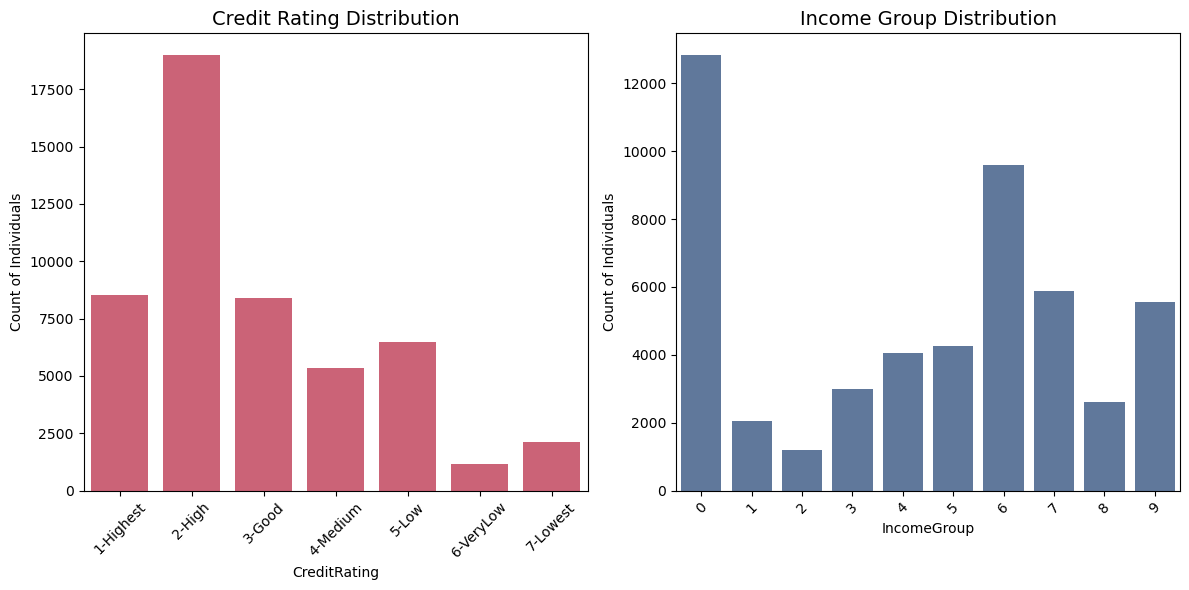

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for ax, column, color in zip(ax.ravel(), financial_columns.keys(), colors_of_seoul):
    counts = train[column].value_counts().reset_index()
    counts = counts.sort_values(column)

    sns.barplot(x=column, y='count', data=counts, ax=ax, color=color)
    ax.set_title(f'{financial_columns[column]} Distribution', fontsize=14)
    ax.set_ylabel('Count of Individuals')
    ax.set_xlabel(column)
    ax.set_xticks(np.arange(counts.shape[0]))
    ax.set_xticklabels(counts[column], rotation=45)

plt.tight_layout()

##### Demographic Covariates Distribution

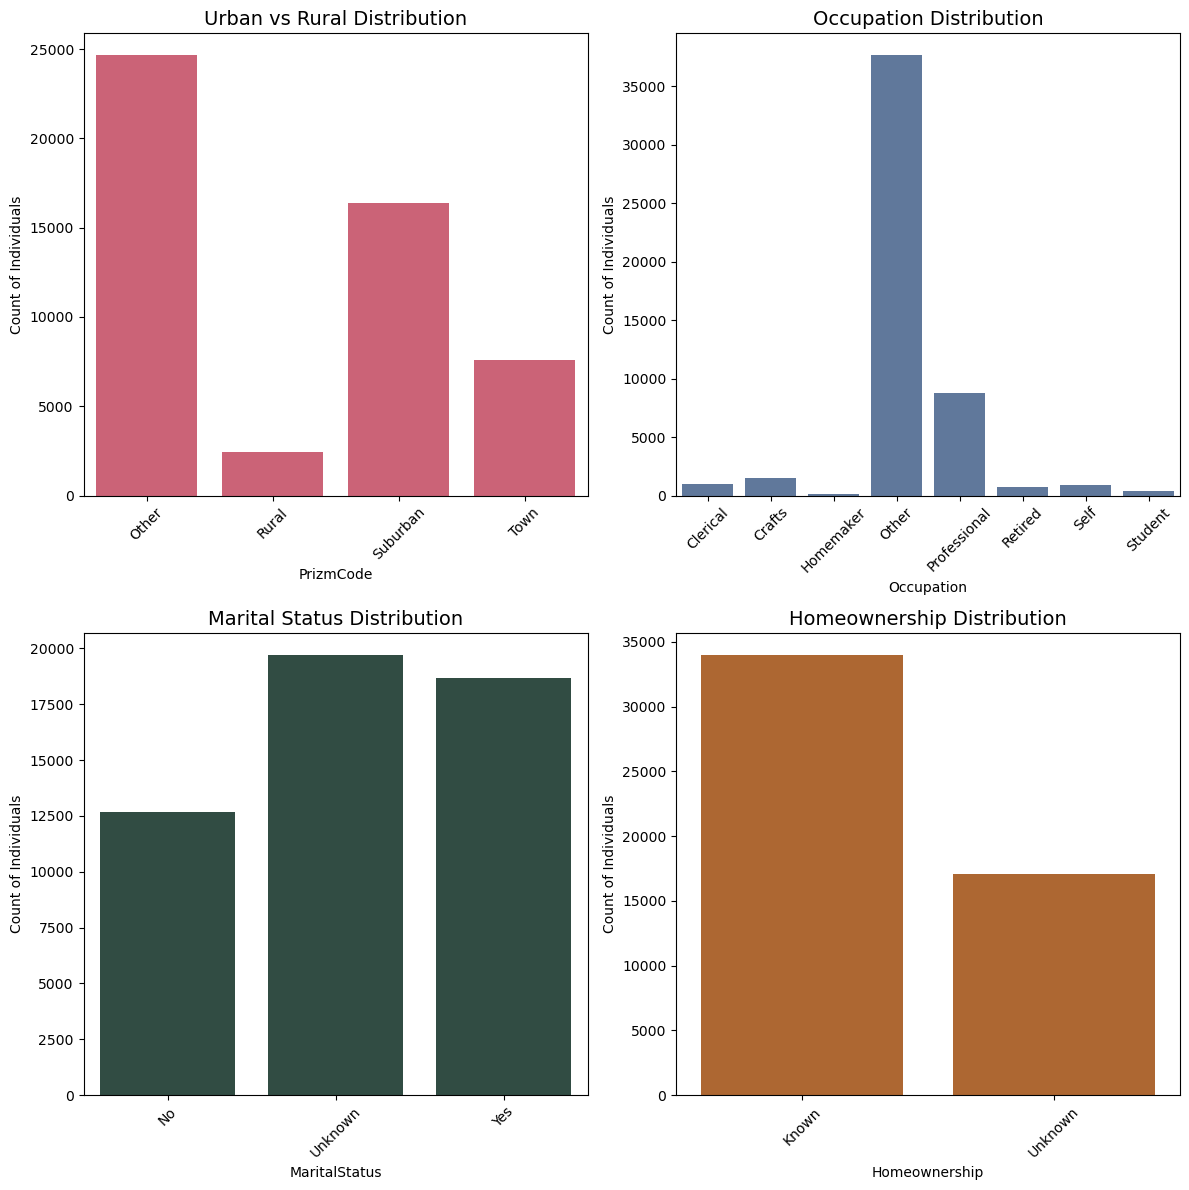

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for ax, column, color in zip(ax.ravel(), demographic_columns.keys(), colors_of_seoul):
    counts = train[column].value_counts().reset_index()
    counts = counts.sort_values(column)

    sns.barplot(x=column, y='count', data=counts, ax=ax, color=color)
    ax.set_title(f'{demographic_columns[column]} Distribution', fontsize=14)
    ax.set_ylabel('Count of Individuals')
    ax.set_xlabel(column)
    ax.set_xticks(np.arange(counts.shape[0]))
    ax.set_xticklabels(counts[column], rotation=45)

plt.tight_layout()

#### Continous Variables

In [57]:
continous_features = train.select_dtypes(include=[np.float64]).columns
# Need to choose correct subset of features
continous_features = continous_features[0:6]

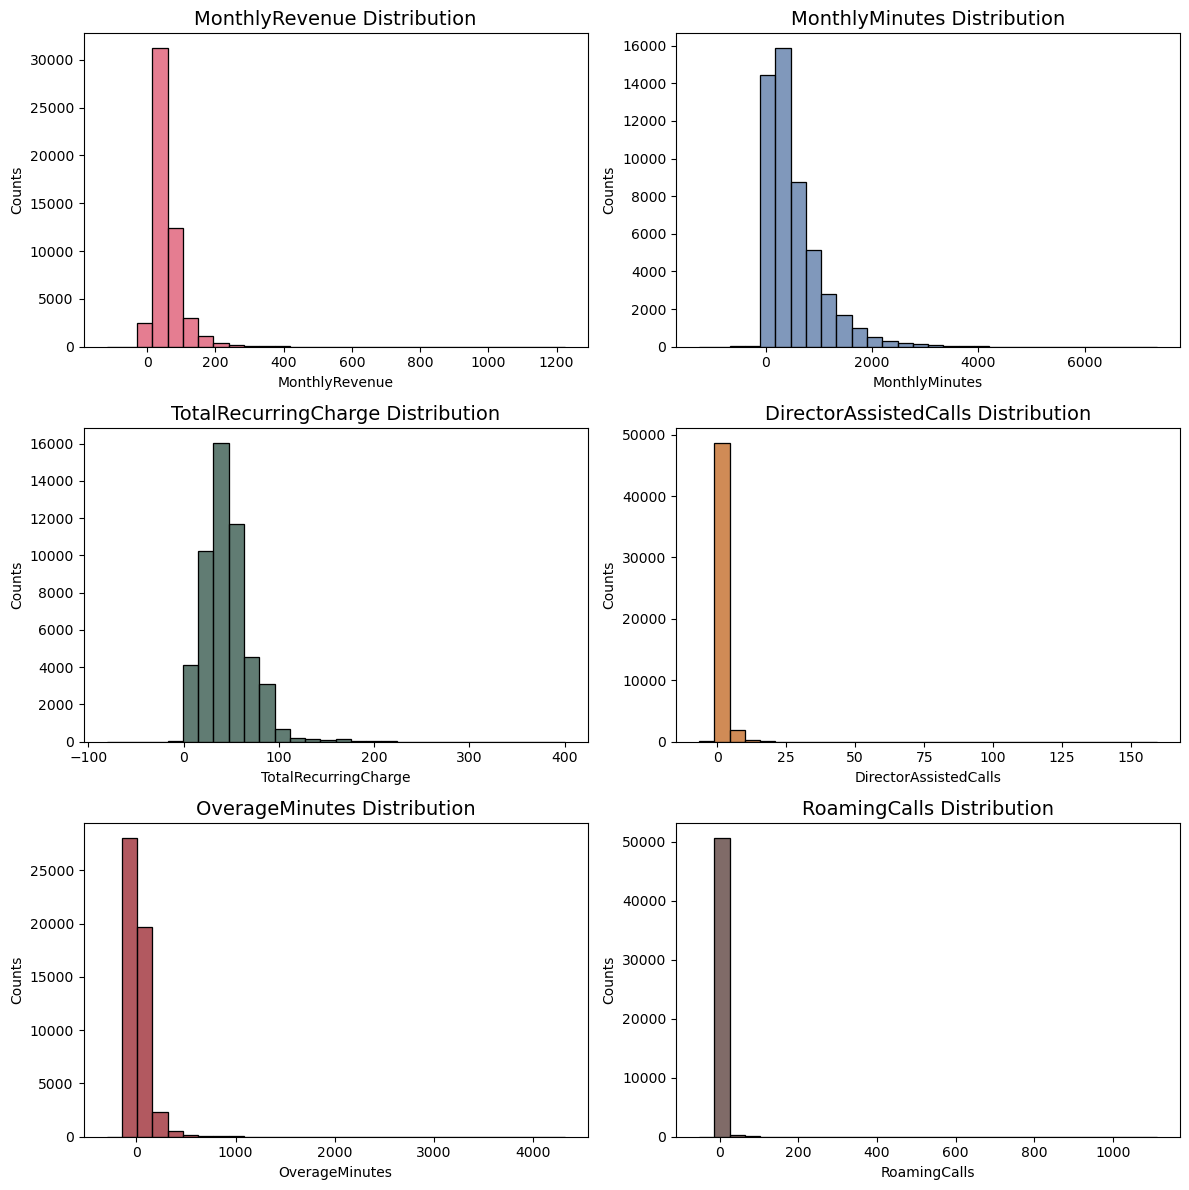

In [58]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for ax, column, color in zip(ax.ravel(), continous_features, colors_of_seoul):
    sns.histplot(x=column, data=train[[column]], bins=30, ax=ax, color=color)
    ax.set_title(f'{column} Distribution', fontsize=14)
    ax.set_ylabel('Counts')
    ax.set_xlabel(column)

plt.tight_layout()

#### Correlates of Churn

In [59]:
X_train = train.drop(columns=['CustomerID', 'Churn'])
pd.set_option('future.no_silent_downcasting', True)
y_train = train['Churn'].replace({'Yes': 1, 'No': 0})

In [60]:
continuous_features = [
    "MonthlyRevenue", 
    "TotalRecurringCharge",
    "OverageMinutes",
    "MonthlyMinutes",
    "DroppedCalls",
    "ReceivedCalls",
]

# Total of 6
count_features = list(financial_columns.keys()) + list(demographic_columns.keys())

features = continuous_features + count_features

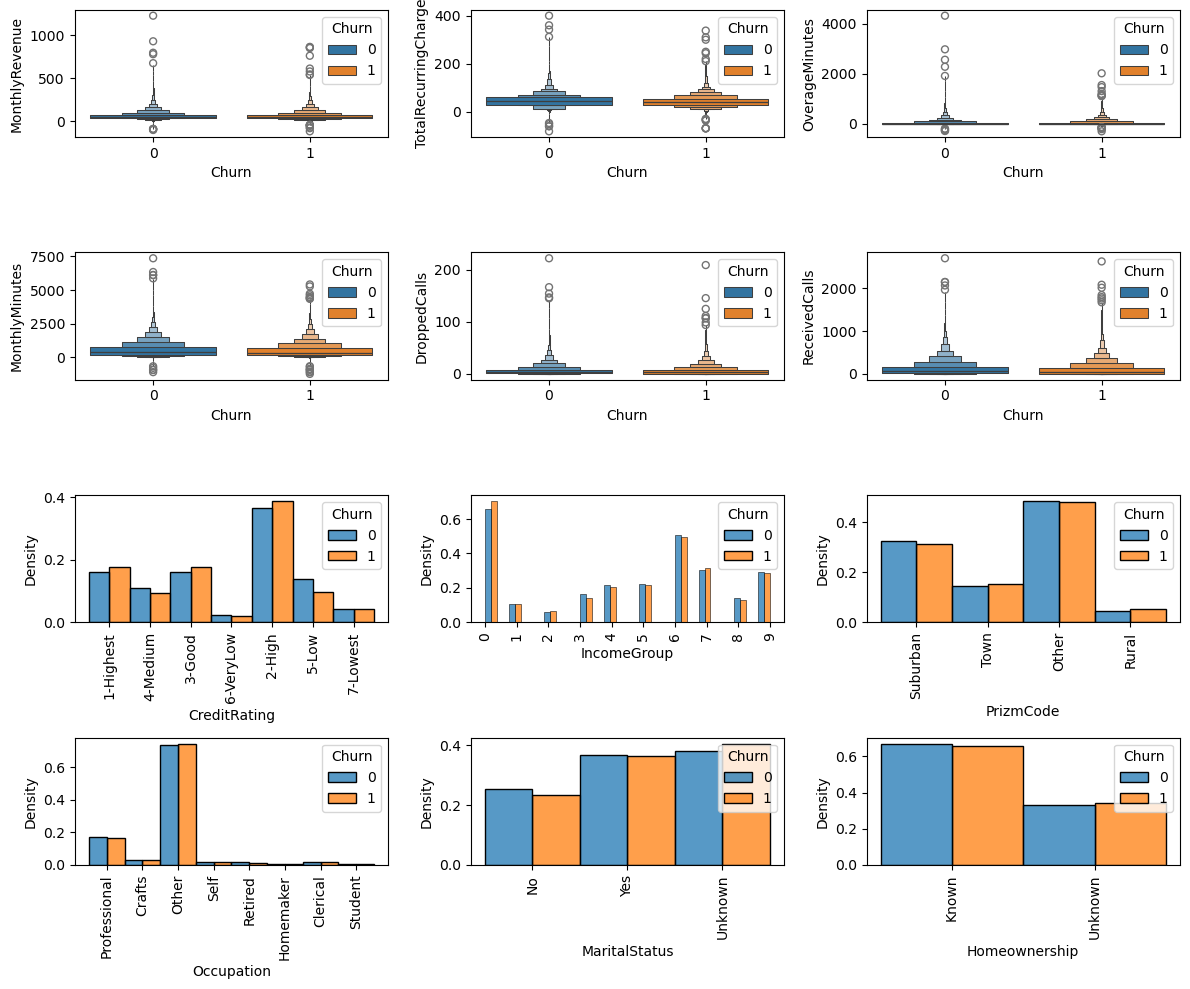

In [61]:
fig, ax = plt.subplots(4, 3, figsize=(12, 10))  

for ax, feature in zip(ax.ravel(), features):
    if feature in continuous_features:
        _=sns.boxenplot(
            x="Churn", 
            y=feature, 
            data=pd.concat([X_train, y_train], axis=1),
            hue='Churn', 
            ax=ax
        )
        
    elif (feature in count_features):
        _ = sns.histplot(
            x=feature, 
            hue="Churn", 
            multiple="dodge", 
            stat='density', 
            common_norm=False,
            data = pd.concat([X_train, y_train], axis=1),
            ax=ax
        )
        ax.set_xticks(np.arange(X_train[feature].nunique()))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    else:
        pass
    

plt.tight_layout()

## Exploratory Data Analysis

### Deeper Understanding of the Data

While basic EDA is important, you should aim to provide a deeper understanding of the data through your analysis. This can be achieved by identifying patterns, trends, class imbalances, and outliers in the data. Additionally, explore the relationships between variables and identify any potential confounding variables that may impact the analysis.

1. Trends: We explored the trend using the only temporal feature "MonthsInService"
   - Initial drop: The churn rate starts around 0.2, drops slightly.
   - Sharp increase: The churn rate increases sharply around the 10 month mark. This could indicate that the users may have some sort of contract that binds them for 10 months.
   - Stablizes: After the spike on the 10th month, churn rate slightly declines and stabilize hovering over 0.2 ~ 0.4 over the next several months.
   - Large fluctuation >50 months: Twards the end, the data shows heavy fluctuation and a spike at the end indicating a potential outlier.
3. Class imbalance: Class imbalance was previously identified and handeled in MS2
4. Outliers:
   - We can identify from the box plot and distribution plots that there are outliers in the dataset. Instead of removing the outliers right now, we'll use different methods such as (1) Cook's distance (if using linear regression) and (2) principal component analysis (PCA) to handle outliers. 
5. Relationship between variables:
   We found strong correlations between features that can lead to multicollinearity. (both shown in the heatmap and pairplots) Later we'll explore methods such as (1) removing one of the correlated features, (2) PCA, (3) feature selection to determine the best method to handle multicollinearity issue.
   - MonthlyRevenue & OverageMinutes: 0.786
   - MonthlyRevenue & MonthlyMinutes: 0.710
   - MonthlyMinutes & ReceivedCalls: 0.828


   However, we didn't find any feature that has direct correlation with Churn. This is interesting as we were expecting at least a weak correlation between some features and churn. It suggests that chrun might depend on more complex interactions between multiple features. 

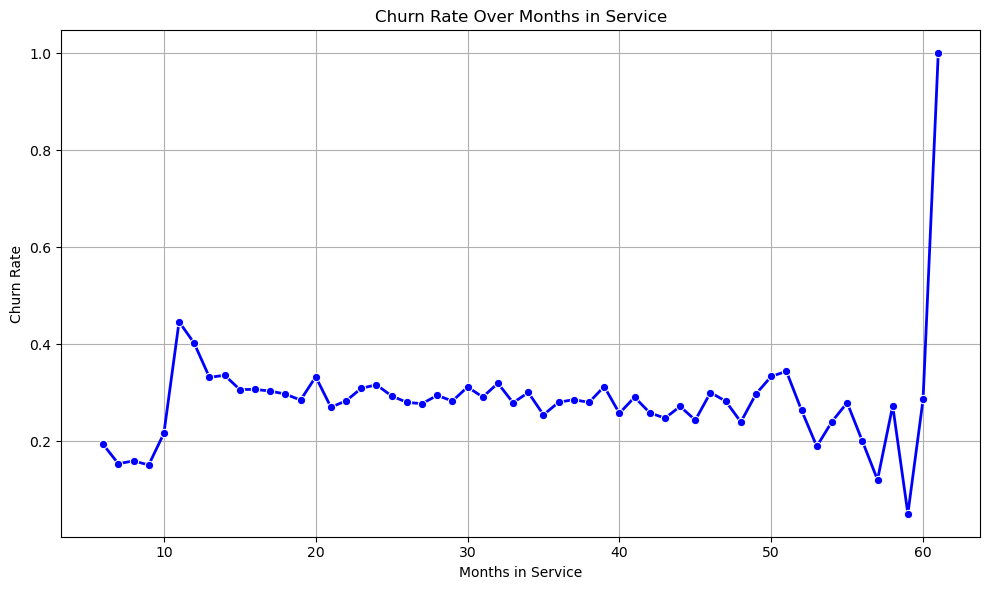

In [62]:
# Identifying the trend using time trended variable: "MonthsInSerivce"

train['Churn'] = train['Churn'].map({'Yes': 1, 'No': 0})
monthly_churn_rate = train.groupby('MonthsInService')['Churn'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthsInService', y='Churn', data=monthly_churn_rate, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Churn Rate Over Months in Service')
plt.xlabel('Months in Service')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

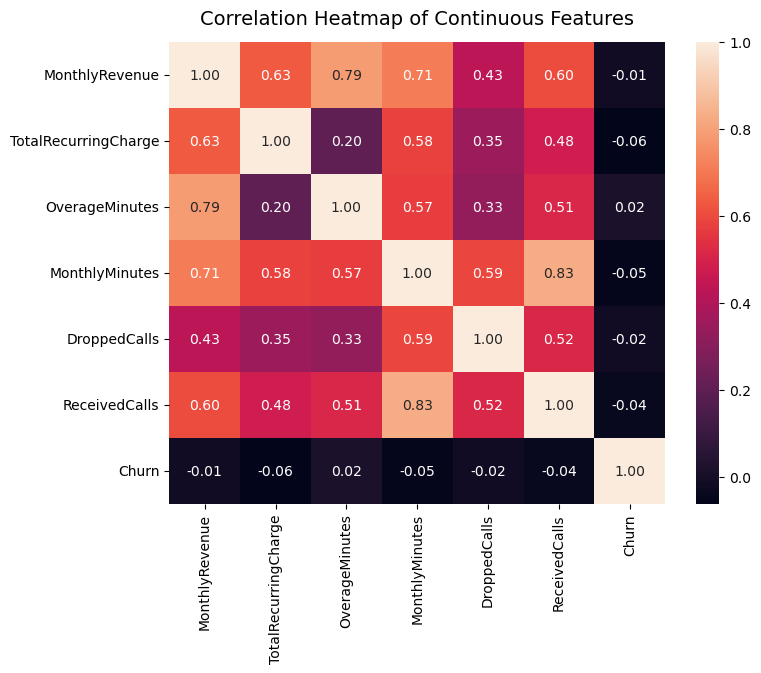

Strong correlations:
                       MonthlyRevenue  TotalRecurringCharge  OverageMinutes  \
MonthlyRevenue              1.000000              0.631675        0.785948   
TotalRecurringCharge        0.631675              1.000000             NaN   
OverageMinutes              0.785948                   NaN        1.000000   
MonthlyMinutes              0.710404                   NaN             NaN   
DroppedCalls                     NaN                   NaN             NaN   
ReceivedCalls               0.603752                   NaN             NaN   
Churn                            NaN                   NaN             NaN   

                      MonthlyMinutes  DroppedCalls  ReceivedCalls  Churn  
MonthlyRevenue              0.710404           NaN       0.603752    NaN  
TotalRecurringCharge             NaN           NaN            NaN    NaN  
OverageMinutes                   NaN           NaN            NaN    NaN  
MonthlyMinutes              1.000000           NaN   

In [63]:
# Correlation heatmap for continuous variables
correlation_matrix = pd.concat([X_train[continuous_features], y_train], axis=1).corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))  
sns.heatmap(
    correlation_matrix, 
    annot=True,
    fmt=".2f",
    ax=ax
)
ax.set_title('Correlation Heatmap of Continuous Features', fontsize=14, y=1.02)
plt.show();

# Identify strong correlations (greater than 0.6 or less than -0.6)
strong_corr = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]
print("Strong correlations:\n", strong_corr)

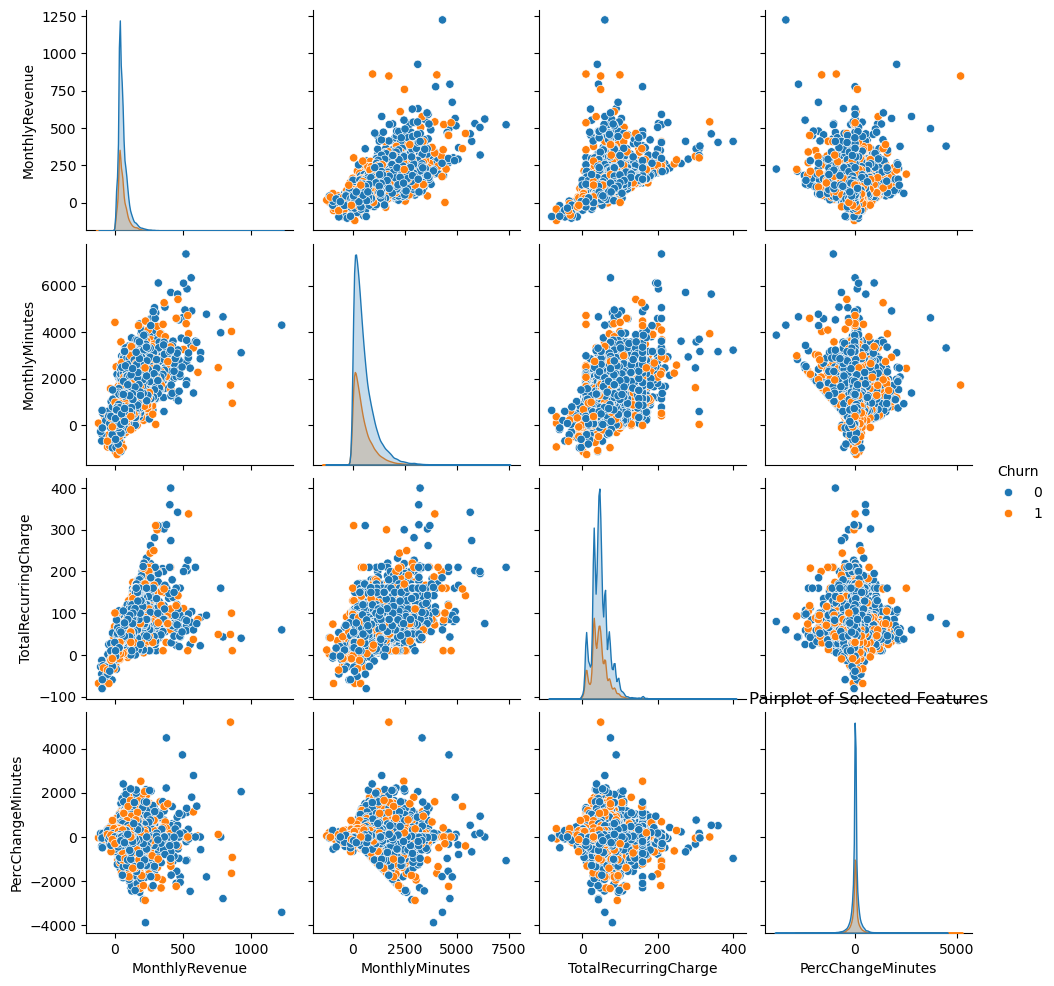

In [64]:
# Pairplot of selected features (can delete them if it is confusing)
sns.pairplot(train[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'PercChangeMinutes', 'Churn']], hue='Churn')
plt.title('Pairplot of Selected Features')
plt.show()

### Meaningful Insights

The EDA report should provide meaningful insights that can be connected back to the problem at hand. These insights should be well-supported by the data and provide actionable recommendations for addressing the problem. You should focus on providing insights that are relevant to the project question and will add value to the final analysis.

In [65]:
# I think the "deeper analysis" part actually answered all the meaningful insights section. Let me know if I should be adding more details here! 

##3 Noteworthy Findings

Summarize the noteworthy findings of their EDA in a clear and concise manner. This can be achieved through the use of visualizations and captions that highlight the most important insights gained through the analysis.

### 1. Service Quality Impact
- Based on the correlation heatmap and pair plot, we don’t see a strong direct correlation between `DroppedCalls` and `Churn`. This suggests that while service quality could impact churn, `DroppedCalls` alone does not show a significant linear relationship with churn.

### 2. Financial Patterns
- **Revenue & Charges**: The correlation heatmap shows a strong relationship between `MonthlyRevenue` and `OverageMinutes` (0.79), as well as `MonthlyRevenue` and `MonthlyMinutes` (0.71). 
- **Churn Correlation**: There is a very weak or negligible correlation between financial variables like `MonthlyRevenue`, `TotalRecurringCharge`, and churn, suggesting that churn is likely influenced by more complex interactions of these variables rather than a single factor.

### 3. Demographic Insights
- **Credit Rating**: Credit rating distribution shows a higher density of churn among customers with a medium (2-High) credit rating.
- **Income Group**: Income Group 6 has the highest representation, while Income Group 0 shows a more varied churn rate.

### 4. Continuous Variables Analysis
- **Monthly Revenue**: The distribution is heavily right-skewed, with most customers having a monthly revenue below.
- **Monthly Minutes**: Similarly right-skewed, showing that most customers have low usage, but a few consume a large number of minutes.
- **Total Recurring Charge**: Right-skewed distribution suggests that most customers have low recurring charges.

### 5. Churn Trends Over Time
- **10-Month Spike**: The churn rate chart shows a significant increase around the 10-month mark, possibly indicating a contract or milestone prompting churn.
- **Long-Term Fluctuations**: After stabilizing around 20-40% for most of the service period, churn rate experiences fluctuations after 50 months, with a sharp peak at the end. 

### 6. Correlation Insights
- **Feature Correlations**: The heatmap shows strong correlations between features like `MonthlyRevenue` & `OverageMinutes` (0.79) and `MonthlyMinutes` & `ReceivedCalls` (0.83), indicating potential multicollinearity, which might need addressing in modeling.
- **No Strong Correlation with Churn**: None of the variables exhibit a strong correlation with churn.


## Research Question

Based on the insights gained through EDA, you should develop a clear project question that will guide your analysis. This question should be well-defined and specific to the problem at hand.

1. **"What variables influence churn, and how can these factors be effectively used to predict customer churn?"**

2. **"How do service usage patterns and financial characteristics, such as monthly revenue and overage charges, impact customer churn rates?"**

3. **"What role do demographic factors (such as income, location, and credit rating) play in predicting customer churn?"**



## Baseline Model

In [4]:
pass